In [1]:
import jax.numpy as jnp
from itertools import count
import jax.random as jr
import jax
from jax import jit,vmap
import matplotlib.pyplot as plt
from utils import *
from plotting_utils import *
jax.config.update("jax_enable_x64", True)

keys = map(jr.PRNGKey, count())

In [2]:
D = 50
K1 = 3
K2 = 2
M = 2

S = 50 
T = 100

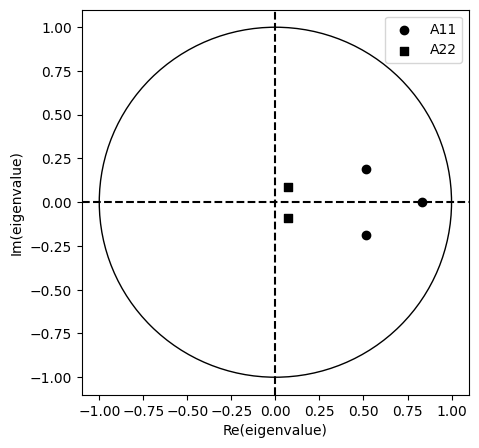

In [3]:
eigs1 = generate_eigenvalues(next(keys), K1, R=1, r=0.5)
eigs2 = generate_eigenvalues(next(keys), K2, R=0.5, r=0.1)

fig, axes = plt.subplots(figsize=(5,5))
plot_eigenvalues(axes, eigs1, eigs2, color='black', label=['A11','A22'], alpha=1)
axes.legend()



In [7]:
LDS = task_subspace_LDS.task_subspace_LDS(D, K1, K2, M)
trueA = LDS.generate_dynamics_matrix(next(keys), eigs1, eigs2)
trueu = LDS.generate_inputs(next(keys), S, T)
B, Q, mu0, Q0, C, d, R = LDS.generate_other_parameters(next(keys), trueA)